In [1]:
import matplotlib
matplotlib.use('TkAgg')  # avoid non-GUI warning for matplotlib

from IPython.display import display, HTML

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

%matplotlib inline

In [2]:
import WalkEnv as Env

In [3]:
env = Env.RandomMove(live_display=True)

In [82]:
class BasePolicy:
    def action(self, state):
        pass
    
    def update(self, reward_n, state_n, done_n):
        pass


class BehaviourPolicy(BasePolicy):
    def action(self, state):
        return np.random.choice([0, 1])

In [83]:
behaviour_policy = BehaviourPolicy()

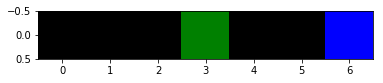

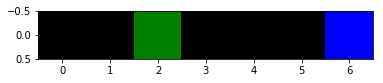

2 0 False


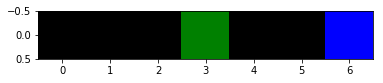

3 0 False


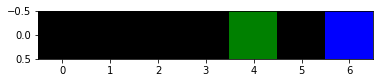

4 0 False


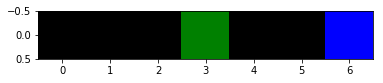

3 0 False


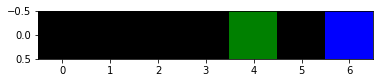

4 0 False


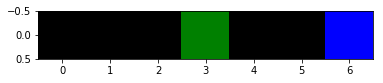

3 0 False


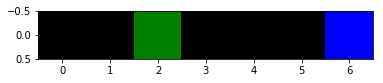

2 0 False


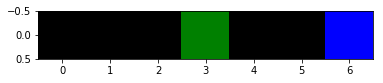

3 0 False


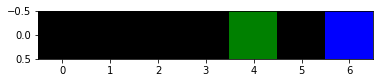

4 0 False


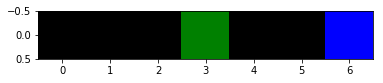

3 0 False


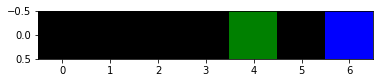

4 0 False


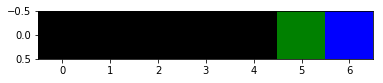

5 0 False


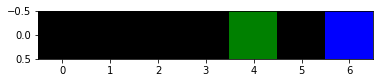

4 0 False


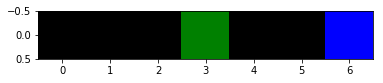

3 0 False


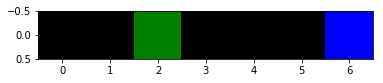

2 0 False


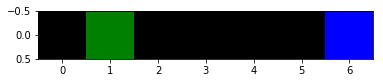

1 0 False


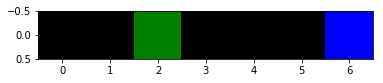

2 0 False


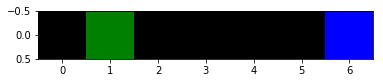

1 0 False


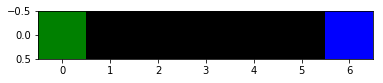

0 0 True


In [84]:
env.reset()
obs = env._obs()
plt.imshow(obs, cmap=env.cmap, norm=env.norm)
plt.show()
for i in range(100):
    action = behaviour_policy.action(obs)
    s, r, d, _ = env.step(action)
    obs = env._obs()
    plt.imshow(obs, cmap=env.cmap, norm=env.norm)
    plt.show()
    print(s, r, d)
    if d: break

In [128]:
class OnlineTD0(BehaviourPolicy):
    def __init__(self, state_n, discount=0.9, step_size=0.8):
        self.v_table = np.zeros(state_n)
        self.discount = discount
        self.step_size = step_size
        
    def update(self, reward_n, state_n, done_n):
        old_v_table = np.array(self.v_table)
        next_state = state_n[:]
        next_state.append(-1)
#         print(state_n)
        for s, s_n, r, d in zip(state_n, next_state[1:], reward_n, done_n):
            if d:
                self.v_table[s] += self.step_size * (r - old_v_table[s])
            else:
                self.v_table[s] += self.step_size * (r + self.discount * old_v_table[s_n] - self.v_table[s])
        max_detal = np.max(np.abs(old_v_table - self.v_table))
#         print(old_v_table, self.v_table)
        return max_detal < 0.00000001

In [136]:
online_td0 = OnlineTD0(state_n=7)
s = env.reset()
d = False

state_n = [s,]
reward_n = [0,]
done_n = [False,]

for i in range(100000):
    if d:
        end = online_td0.update(reward_n=reward_n, state_n=state_n, done_n=done_n)
        if end: 
            print('trainig ok, {}'.format(i))
            break
        s = env.reset()
        state_n = [s,]
        reward_n = [0,]
        done_n = [False,]
    action = online_td0.action(s)
    s, r, d, _ = env.step(action)
    r -= 0.001
    state_n.append(s)
    reward_n.append(r)
    done_n.append(d)
    
print(online_td0.v_table)

[-0.001      -0.00190944  0.06721133  0.50145885  0.66432469  0.89202222
  0.999     ]


In [137]:
class OnlineMC(OnlineTD0):
    def update(self, reward_n, state_n, done_n):
        old_v_table = np.array(self.v_table)
        total_r = 0
        for s, r, d in zip(state_n[::-1], reward_n[::-1], done_n[::-1]):
            total_r = total_r * self.discount + r
            self.v_table[s] += self.step_size * (total_r - self.v_table[s])
        max_detal = np.max(np.abs(old_v_table - self.v_table))
        return max_detal < 0.00000001

In [141]:
online_mc = OnlineMC(state_n=7)
s = env.reset()
d = False

state_n = [s,]
reward_n = [0,]
done_n = [False,]

for i in range(1000000):
    if d:
        end = online_mc.update(reward_n=reward_n, state_n=state_n, done_n=done_n)
        if end: 
            print('trainig ok, {}'.format(i))
            break
        s = env.reset()
        state_n = [s,]
        reward_n = [0,]
        done_n = [False,]
    action = online_mc.action(s)
    s, r, d, _ = env.step(action)
    r -= 0.001
    state_n.append(s)
    reward_n.append(r)
    done_n.append(d)
    
print(online_mc.v_table)

[-0.001      -0.00186597 -0.00283013  0.46880314  0.65045947  0.7241292
  0.999     ]
